# Lab 05 Diffraction Grating Spectrometer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from scipy import stats
import pandas as pd

# Initialization of the Linear Regression for mλ vs. Hr

In [2]:
var = pd.read_csv('He Regression.csv')

y = np.array(var['m*lambda'])
x = np.array(var['Hr-graph'])

def group(*xs):
    xs = [np.array(x)[..., None] for x in xs]
    xs.insert(0, np.ones(xs[0].shape))
    return np.hstack(xs)

def linear_regression(y, *xs):
    return np.linalg.lstsq(group(*xs), y, rcond=None)[0]

def R_squared(A, y, *xs):
    y_mean = np.mean(y)
    predictions = A @ group(*xs).T
    return 1 - np.sum((y - predictions) ** 2) / np.sum((y - y_mean) ** 2)

def predictx(A, *xs):
    return A @ group(*xs).T
    
A = linear_regression(y, x)

R2 = R_squared(A, y, x)
l = f"Regression Line Eq: y = {A[1]}x + {A[0]}"

print(l)
print('"Goodness of Fit": ', R2)

Regression Line Eq: y = -56.05960968543514x + 17431.562892228692
"Goodness of Fit":  0.9994042381904875


# Calculating Residuals from Regression

In [3]:
s = np.array(var['m*lambda'])
d1 = np.array(var['cos Hr'])
d2 = np.array(var['sin Hr'])

F = np.linalg.lstsq(
    np.hstack([
        np.ones((*d1.shape, 1)),
        d1[..., None],
        d2[..., None],
    ]),
    s,
    rcond=None,
)[0]

print(f"Residuals: {F}")

Residuals: [-1250.58520444 -1509.33436564 -2999.23100912]


# Plotting mλ vs. Hr

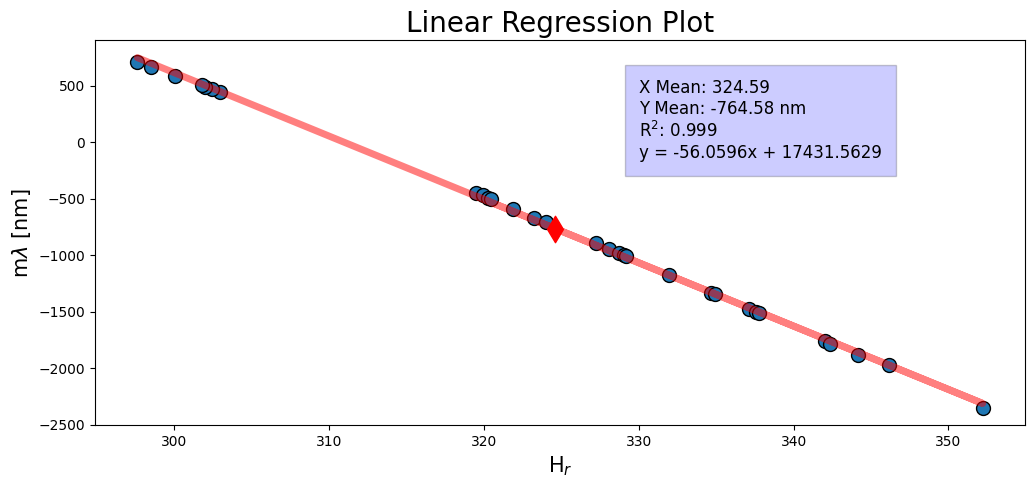

In [4]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=100, linewidths=1, edgecolor='black')
text = '''X Mean: {}
Y Mean: {} nm
R$^2$: {}
y = {}x + {}'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2),  
                       round(R2, 3),
                       round(A[1],4),
                       round(A[0],4))
plt.text(x=330,y=-140,s=text, fontsize=12, bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})
plt.title('Linear Regression Plot', fontsize=20)
plt.xlabel('H$_r$', fontsize=15)
plt.ylabel('m$\lambda$ [nm]', fontsize=15)
plt.plot(x, predictx(A,x), c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='d', s=8**2.5, c='r') # average point
plt.savefig('Linear Regression Plot')

# Plotting Residuals vs. Hr

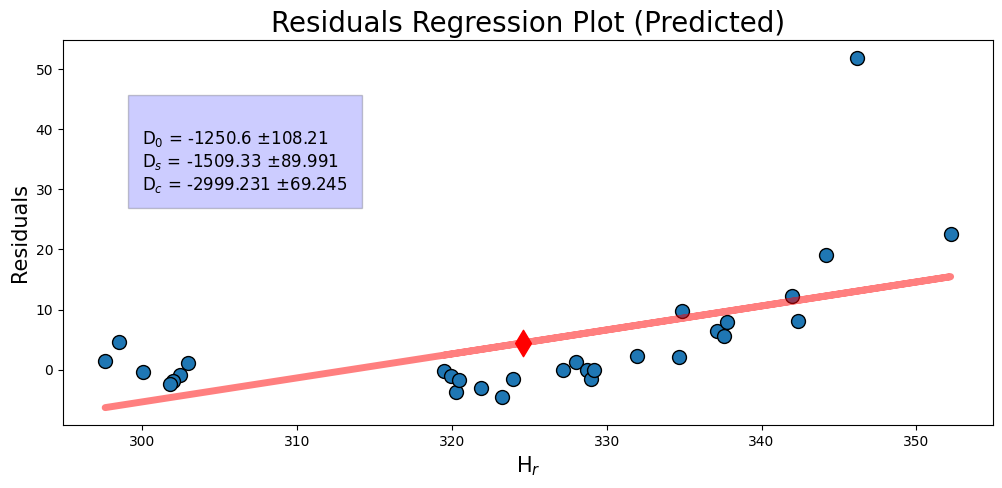

In [5]:
r = np.array(var['residuals'])

def linear_regressionr(r, *xs):
    return np.linalg.lstsq(group(*xs), r, rcond=None)[0]

def predictr(R, *xs):
    return R @ group(*xs).T

R = linear_regressionr(r,x)

plt.figure(figsize=(12,5))
plt.scatter(x, r, s=100, linewidths=1, edgecolor='black')
text = '''
D$_0$ = {} $\pm$108.21
D$_s$ = {} $\pm$89.991
D$_c$ = {} $\pm$69.245'''.format(round(F[0],1),
                    round(F[1],2),
                    round(F[2],3))
plt.text(x=300,y=30,s=text, fontsize=12, bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})
plt.title('Residuals Regression Plot (Predicted)', fontsize=20)
plt.xlabel('H$_r$', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.plot(x, predictr(R,x), c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=r.mean(), marker='d', s=8**2.5, c='r') # average point
plt.savefig('Residuals Regression Plot')
#Deleted Residuals -100 and -32 

# Solving for the Bragg spacing and the incident and normal angles

In [6]:
d = sqrt(F[2]**2+F[1]**2)
D = 1/(d*10**(-6))
Hn = atan(F[2]-F[1])
Hi = (-asin(F[0]/d) + Hn)

print(f"d = {d}\nGrating Spacing = {D} [lines/mm]\nHn = {Hn*(-57.2958)} \nHi = {Hi*(-57.2958)}")

d = 3357.59986796492
Grating Spacing = 297.831796320063 [lines/mm]
Hn = 89.9615759619178 
Hi = 68.0939067775074


# Solving for the Rydberg constant

In [8]:
var = pd.read_csv('H Regression.csv')

y = np.array(var['y=1/lamb'])
x = np.array(var['x'])

def group(*xs):
    xs = [np.array(x)[..., None] for x in xs]
    xs.insert(0, np.ones(xs[0].shape))
    return np.hstack(xs)

def linear_regression(y, *xs):
    return np.linalg.lstsq(group(*xs), y, rcond=None)[0]

def R_squared(A, y, *xs):
    y_mean = np.mean(y)
    predictions = A @ group(*xs).T
    return 1 - np.sum((y - predictions) ** 2) / np.sum((y - y_mean) ** 2)

def predictx(A, *xs):
    return A @ group(*xs).T
    
A = linear_regression(y, x)

R2 = R_squared(A, y, x)
l = f"Regression Line Eq: y = {A[1]}x + {A[0]}"

print(l)
print('"Goodness of Fit": ', R2)

Regression Line Eq: y = 0.006113292968803755x + 0.0007216322992521075
"Goodness of Fit":  0.3627615411976344


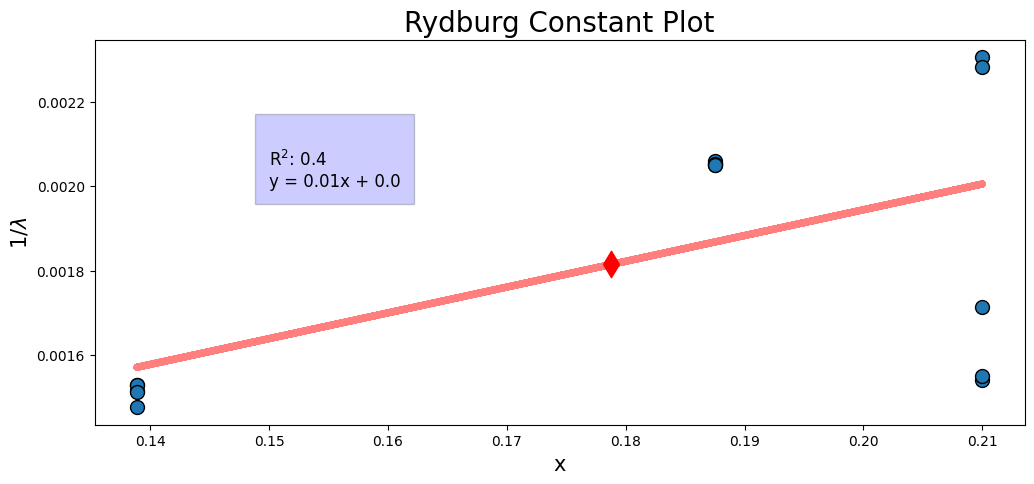

In [13]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=100, linewidths=1, edgecolor='black')
text = '''
R$^2$: {}
y = {}x + {}'''.format(round(R2, 1),
                       round(A[1],2),
                       round(A[0],2))
plt.text(x=0.15,y=0.002,s=text, fontsize=12, bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})
plt.title('Rydburg Constant Plot', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('$1/\lambda$', fontsize=15)
plt.plot(x, predictx(A,x), c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='d', s=8**2.5, c='r') # average point
plt.savefig('Rydburg Constant Plot')